<a href="https://colab.research.google.com/github/charliekang96/201600041KangSaewoon/blob/main/201600041_221113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt

targetUrl_caffeine="https://raw.githubusercontent.com/charliekang96/201600041KangSaewoon/main/caffeine.csv"

df = pd.read_csv(targetUrl_caffeine, sep=',')  

print(df.shape)
df.head()

#csv 파일 가져오기



(610, 5)


,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [ ]:

X = df.iloc[:,1:4]
y = df.iloc[:,4]

print(X[0:4])
print(y[0:4])

#속성을 X, type를 y로

   Volume (ml)  Calories  Caffeine (mg)
0   256.993715         0            277
1   250.191810         0            145
2   250.191810       150            100
3   250.191810         0            430
0    Coffee
1    Coffee
2    Coffee
3    Coffee
Name: type, dtype: object


In [ ]:
df['type'].value_counts()

# type 개수 확인해보기

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

In [ ]:
y = pd.get_dummies(y)

print(y[170:180])

#원-핫 인코딩 처리

     Coffee  Energy Drinks  Energy Shots  Soft Drinks  Tea  Water
170       1              0             0            0    0      0
171       1              0             0            0    0      0
172       1              0             0            0    0      0
173       0              1             0            0    0      0
174       0              1             0            0    0      0
175       0              1             0            0    0      0
176       0              1             0            0    0      0
177       0              1             0            0    0      0
178       0              1             0            0    0      0
179       0              1             0            0    0      0


In [ ]:
normalization_df = (df - df.mean())/df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:

model = Sequential()                                              
model.add(Dense(70, input_dim=3, activation='sigmoid'))
model.add(Dense(40, activation='relu'))
model.add(Dense(6, activation='sigmoid'))



model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X, y, epochs=50, batch_size=20)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 70)                280       
                                                                 
 dense_14 (Dense)            (None, 40)                2840      
                                                                 
 dense_15 (Dense)            (None, 6)                 246       
                                                                 
Total params: 3,366
Trainable params: 3,366
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
31/31 [==============================] - 1s 3ms/step - loss: 0.7003 - accuracy: 0.2738
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.4049
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 0.3614 - accuracy: 0.4541
Epoch 4/50
31/31 [====

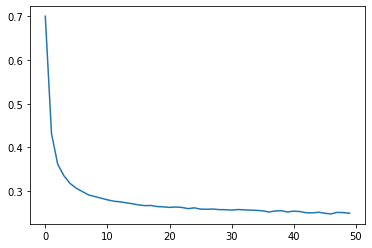

In [ ]:
import numpy as np

y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)

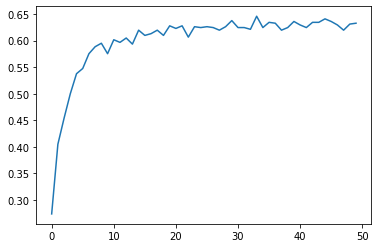

In [ ]:
y_accuracy = history.history['accuracy']

x_len = np.arange(len(y_accuracy))

plt.plot(x_len,y_accuracy)